<h1 style="color:#1f4287">Logistic Regression</h1>

<h2 style="color:#086972">Regression:</h2><br>
It is a Predective Modelling technique that estimates the relationship between dependent (target) and an independent variable (input).

<h3 style="color:#086972"> Logistic Regression: </h3><br>
Produces results in a binary format which is used to predict the outcome of a categorical dependent variable in the form of<br>
0 or 1<br>
Yesr or No<br>
True or False

<h2 style="color:#086972">Collecting Data/ Importig libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset/titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Total passengers:" + str(len(dataset.index)))

Total passengers:891


<h2 style="color:#086972"> Analyzing data

<AxesSubplot:xlabel='Survived', ylabel='count'>

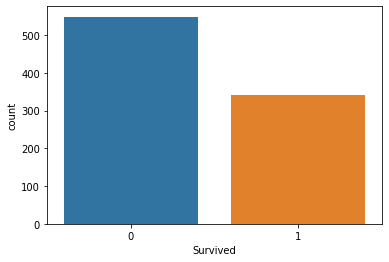

In [4]:
sns.countplot(x='Survived', data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

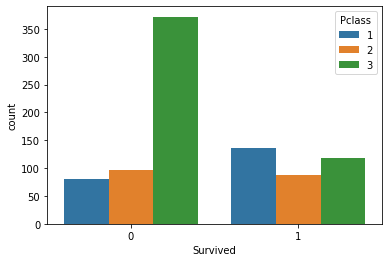

In [5]:
sns.countplot(x='Survived', hue='Pclass', data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

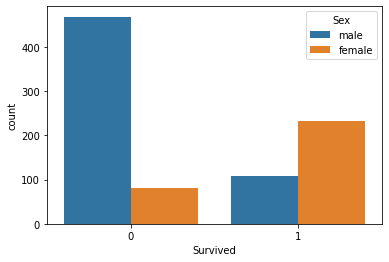

In [6]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

<AxesSubplot:ylabel='Frequency'>

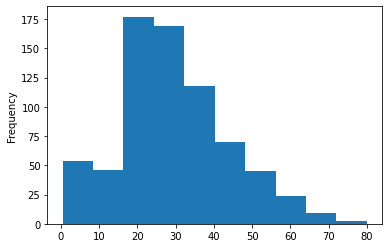

In [7]:
dataset["Age"].plot.hist()

<h2 style="color:#086972">Data wrangling

In [8]:
#checking null values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Satisfaction Level**</li>
    <li>**Average Monthly Hours**</li>
    <li>**Promotion Last 5 Years**</li>
    <li>**Salary**</li>
</ol>

In [9]:
new_data=dataset[['Survived','Pclass','Sex','Age']]
new_data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [10]:
# dataset.dropna(inplace=True)
new_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [11]:
new_data.dropna(inplace=True)

<ipython-input-11-a2eb0d94fae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.dropna(inplace=True)


In [12]:
gender_dummy=pd.get_dummies(new_data['Sex'])

In [13]:
gender_dummy.head(5)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [14]:
gender_dummy=pd.get_dummies(new_data['Sex'], drop_first=True)

In [15]:
gender_dummy.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
Pclass_dummy=pd.get_dummies(new_data['Pclass'])

In [17]:
Pclass_dummy.head(5)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [18]:
Pclass_dummy=pd.get_dummies(new_data.Pclass, drop_first=True, prefix="Class")

In [19]:
Pclass_dummy.head(5)

,Class_2,Class_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [20]:
new_data=pd.concat([new_data,gender_dummy,Pclass_dummy], axis=1)

In [21]:
new_data.head(5)

,Survived,Pclass,Sex,Age,male,Class_2,Class_3
0,0,3,male,22.0,1,0,1
1,1,1,female,38.0,0,0,0
2,1,3,female,26.0,0,0,1
3,1,1,female,35.0,0,0,0
4,0,3,male,35.0,1,0,1


In [22]:
new_data.drop(['Pclass','Sex'], axis=1, inplace=True)

In [23]:
new_data.head(5)

,Survived,Age,male,Class_2,Class_3
0,0,22.0,1,0,1
1,1,38.0,0,0,0
2,1,26.0,0,0,1
3,1,35.0,0,0,0
4,0,35.0,1,0,1


## Train and Test data

In [24]:
x= new_data.drop("Survived",axis=1)
# dependent variable

y=new_data["Survived"]
# output

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg')

In [44]:
model.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [45]:
prediction = model.predict(X_test)
prediction

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.73      0.70      0.72        81

    accuracy                           0.79       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.79      0.79      0.79       215



In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction))

[[113  21]
 [ 24  57]]


In [49]:
model.score(X_test,y_test)

0.7906976744186046